### Load Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")

In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

### Data Cleaning

In [ ]:
df.isnull().sum()

In [ ]:
# Drop Unnecessary columns
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [ ]:
df

In [ ]:
# data shape:
row, columns = df.shape
print("Data Row:", row)
print("Data Columns:", columns)

In [ ]:
# column names:
df.columns

In [ ]:
# descriptions 
display(df.describe().T)

In [ ]:
df.describe()

In [ ]:
# Map 'M' to 1.0 and 'B' to 0.0 in the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1.0, 'B': 0.0})

# Convert the 'diagnosis' column to float data type
df['diagnosis'] = df['diagnosis'].astype(float)

In [ ]:
#### Also do the same thing by using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Encode the 'diagnosis' column
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

#### Data Visualization

###### The code calculates the correlation matrix using df.corr() and then creates a clustermap using sns.clustermap() to visualize the correlations between features. The clustermap clusters the rows and columns based on their correlation similarity. The annot=True argument displays the correlation values on the heatmap, and fmt=".2f" formats the values to two decimal places. The clustermap's size is set to (20, 14) for better readability, and the title of the clustermap is set to "Correlation Between Features" using plt.title().

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a clustermap to visualize the correlation matrix
sns.clustermap(corr_matrix, annot=True, fmt=".2f", figsize=(20, 14))

# Set the title of the clustermap
plt.title("Correlation Between Features")


### Exploratory data analysis (EDA) using Klib Library

In [ ]:
import klib

In [ ]:
klib.corr_mat(df) 

In [ ]:
klib.corr_plot(df, figsize=(20,14))   # returns a color-encoded heatmap, ideal for correlations

## Data Visualization

#### Dtale

In [ ]:
import dtale

In [ ]:
dtale.show(df)

In [ ]:
unique_values = df['diagnosis'].nunique()
print("Number of unique values in the 'diagnosis' column:", unique_values)
unique_diagnosis = df['diagnosis'].value_counts()
print("Unique values in the 'diagnosis' column:")
print(unique_diagnosis)


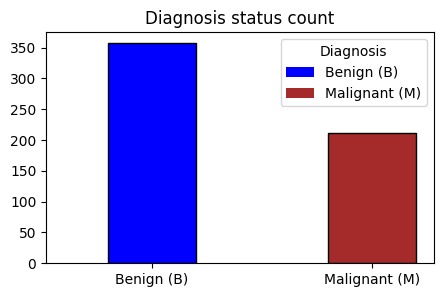

In [107]:
# Calculate the counts of each diagnosis category
diagnosis_counts = df['diagnosis'].value_counts()

# Define the labels for the two diagnosis categories
labels = ['Benign (B)', 'Malignant (M)']

# Create a bar plot
plt.figure(figsize=(5, 3))  # Set the figure size
plt.title('Diagnosis status count')  # Set the title of the plot

colors = ['blue', 'brown']
plt.bar(labels, diagnosis_counts, edgecolor='k', width=0.4, color=colors)  # Create the bar plot

# Create a custom legend
legend_elements = [
    plt.bar([0], [0], color=colors[0], label=labels[0]),  # Create a dummy bar for the first label
    plt.bar([0], [0], color=colors[1], label=labels[1])  # Create a dummy bar for the second label
]

plt.legend(handles=legend_elements, title="Diagnosis")  # Add the legend with custom handles

plt.show()  # Display the plot

In [ ]:
# Calculate the counts of each diagnosis category
diagnosis_counts = df['diagnosis'].value_counts()

# Define the labels for the two diagnosis categories
labels = ['Benign (B)', 'Malignant (M)']

# Define the colors for the pie chart
colors = ['blue', 'brown']

# Create a figure and set the title
plt.figure(figsize=(4, 4))
plt.title('Diagnosis Distribution')

# Create a pie chart with the diagnosis counts, labels, colors, and percentage format
plt.pie(diagnosis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set the aspect ratio to ensure the pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


## Data Training

###### In this code, the df DataFrame is split into the feature matrix x (containing all columns except the last one) and the target variable y (containing only the last column). Then, the train_test_split function is used to split the data into training and test sets. The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing. The random_state parameter is set to 2020 for reproducibility. Finally, the shapes of the training and test sets are printed.

In [ ]:
# Select the features (input variables) by indexing all rows and columns except the last column
x = df.iloc[:, 0:-1]

# Select the target variable (diagnosis) by indexing all rows and the last column
y = df.iloc[:, -1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2020)

print('shape of x_train = ', x_train.shape)
print('shape of y_train = ', y_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_test = ', y_test.shape)

###### In this code, we import the KNeighborsClassifier from scikit-learn. We create an instance of the classifier with n_neighbors=5, indicating that it should consider the 5 nearest neighbors for classification. Then, we fit the classifier to the training data using the fit method. Finally, we calculate the accuracy score of the classifier on the test data using the score method, and print the accuracy score.

In [ ]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier with 5 neighbors
classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
classifier.fit(x_train, y_train)

# Calculate the accuracy score on the test data
accuracy = classifier.score(x_test, y_test)

# Print the accuracy score
print('Accuracy:', accuracy)


In [91]:
y_pred = classifier.predict(x_test)

## Predictions

In [99]:
import pandas as pd
# Define the patient data as a dictionary
patient_Data = {
    'diagnosis': [23.9],
    'radius_mean': [17.99],
    'texture_mean': [10.38],
    'perimeter_mean': [122.8],
    'area_mean': [1001.0],
    'smoothness_mean': [0.1184],
    'compactness_mean': [0.2776],
    'concavity_mean': [0.3001],
    'concave points_mean': [0.1471],
    'symmetry_mean': [0.2419],
    'fractal_dimension_mean': [0.07871],
    'radius_se': [1.095],
    'texture_se': [0.9053],
    'perimeter_se': [8.589],
    'area_se': [153.4],
    'smoothness_se': [0.006399],
    'compactness_se': [0.04904],
    'concavity_se': [0.05373],
    'concave points_se': [0.01587],
    'symmetry_se': [0.03003],
    'fractal_dimension_se': [0.006193],
    'radius_worst': [25.38],
    'texture_worst': [17.33],
    'perimeter_worst': [184.6],
    'area_worst': [2019.0],
    'smoothness_worst': [0.1622],
    'compactness_worst': [0.6656],
    'concavity_worst': [0.7119],
    'concave points_worst': [0.2654],
    'symmetry_worst': [0.4601],
    'fractal_dimension_worst': [0.1189]
}

# Create a DataFrame from the patient data
patient1 = pd.DataFrame(patient_Data)


In [95]:
patient1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,23.9,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [105]:
predict =classifier.predict(patient1)
print(f"{predict[0]:.2f}")

1.00


In [106]:
classifier.predict(patient1)
 
pred = classifier.predict(patient1)
 
if pred[0] == 0:
  print('Patient has no Cancer (malignant tumor)')
else:
  print('Patient has Cancer (malignant benign)')

Patient has Cancer (malignant benign)


In [ ]:
#If we want to avoide the fil-up the numbers, we can use this line
# Create a dictionary with random values for each column
patient_data = {
    column: [np.random.rand()] for column in df.columns[:-1]
}

# Create the DataFrame with the random values
patient1 = pd.DataFrame(patient_data)

# Predict the diagnosis
prediction = classifier.predict(patient1)

# Map the prediction to a diagnosis label
diagnosis = 'Malignant' if prediction[0] == 1 else 'Benign'

print(f"Predicted diagnosis: {diagnosis}")


![Screenshot 2023-03-22 125949.png](<attachment:Screenshot 2023-03-22 125949.png>)
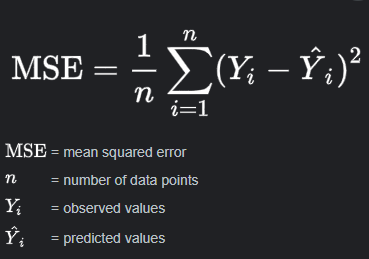

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = classifier.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
